In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#converting the data to np array to enable the cool math stuff which will be done later
data = np.array(data)
#getting the shape
m, n = data.shape
np.random.shuffle(data)
# creating the val and train sets
data_val = data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [5]:
X_train[0].shape

(41000,)

In [6]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# our first column
X_train[:, 0].shape

(784,)

In [14]:
# Normalizing pixel values to [0,1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [15]:
# initializing all the parameters
def init_params():
  W1 = np.random.rand(10, 784) - 0.5 # hidden layer: 10 neurons
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5 # output layer: 10 neurons
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

# activation : the mighty sweety ReLU
def ReLU(Z):
  return np.maximum(0, Z)

# activation for ouput layer : Softmax
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # for stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)


# forward propogation
def forward_prop(W1, b1, W2,b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

# we need to one hot encode 'Y' for using it in loss calculation
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

# derivative of the activation function.... to be implemnetd in back propogation
def ReLU_deriv(Z):
  return Z > 0

# back propogation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  m = X.shape[1]
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
  return dW1, db1, dW2, db2

# updating the parameters ....(btw alpha is learning rate here)
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2



In [16]:
# predictions
def get_predictions(A2):
  return np.argmax(A2, 0)

#accuracy
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

# implementing gradient descentt
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            # fetching prediction
            predictions = get_predictions(A2)
            # calculating accuracy
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 0 1 ... 9 6 0] [3 9 3 ... 3 0 7]
0.10282926829268292
Iteration:  10
[2 2 2 ... 9 6 2] [3 9 3 ... 3 0 7]
0.17202439024390243
Iteration:  20
[2 2 2 ... 9 6 2] [3 9 3 ... 3 0 7]
0.2657560975609756
Iteration:  30
[2 2 2 ... 9 6 2] [3 9 3 ... 3 0 7]
0.31202439024390244
Iteration:  40
[2 2 2 ... 9 6 4] [3 9 3 ... 3 0 7]
0.3434146341463415
Iteration:  50
[5 2 2 ... 5 6 4] [3 9 3 ... 3 0 7]
0.37129268292682926
Iteration:  60
[5 2 2 ... 5 6 4] [3 9 3 ... 3 0 7]
0.40936585365853656
Iteration:  70
[5 2 3 ... 5 5 4] [3 9 3 ... 3 0 7]
0.44309756097560976
Iteration:  80
[5 2 3 ... 5 5 4] [3 9 3 ... 3 0 7]
0.47424390243902437
Iteration:  90
[5 4 3 ... 3 5 4] [3 9 3 ... 3 0 7]
0.5029512195121951
Iteration:  100
[5 4 3 ... 3 5 4] [3 9 3 ... 3 0 7]
0.5327317073170732
Iteration:  110
[5 4 3 ... 3 5 4] [3 9 3 ... 3 0 7]
0.5671951219512195
Iteration:  120
[5 4 3 ... 3 5 4] [3 9 3 ... 3 0 7]
0.594170731707317
Iteration:  130
[5 4 3 ... 3 5 4] [3 9 3 ... 3 0 7]
0.6191707317073171
Iteration: 

In [21]:
# testinggg
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction:", prediction[0])
    print("Label:", label)

    # Reshape and scale back to 0-255 for display
    current_image = (current_image.reshape(28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [3]
Label:  3


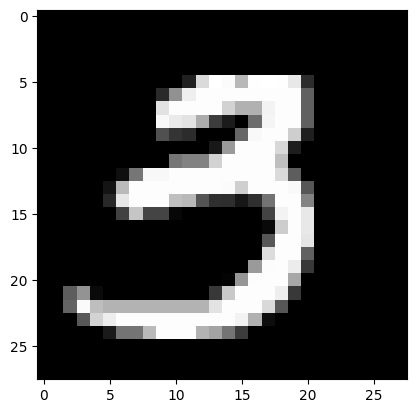

Prediction:  [4]
Label:  9


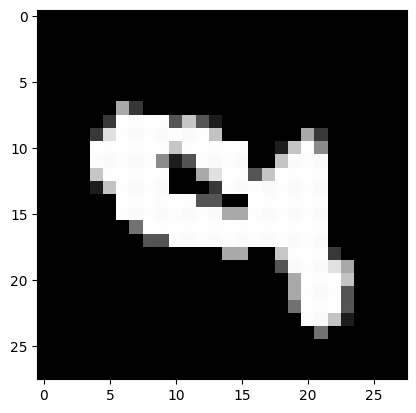

Prediction:  [8]
Label:  3


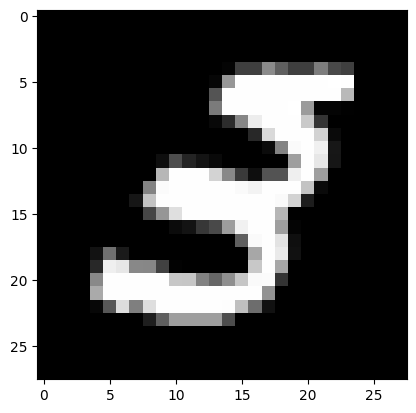

Prediction:  [1]
Label:  1


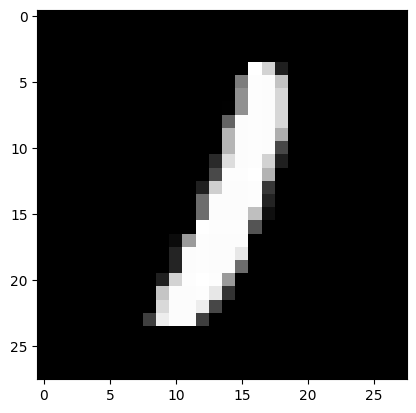

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
# calculating accuracy on the val set
def evaluate(X, Y, W1, b1, W2, b2):
    predictions = make_predictions(X, W1, b1, W2, b2)
    return get_accuracy(predictions, Y)

print("Accuracy:", evaluate(X_val, Y_val, W1, b1, W2, b2))


[9 8 7 7 4 0 2 7 8 3 2 6 0 3 1 9 4 2 0 8 1 3 9 3 1 1 1 1 9 3 8 5 6 7 2 8 3
 5 6 3 1 1 1 5 6 4 3 0 1 6 0 2 1 7 6 5 1 1 4 4 1 0 2 6 5 6 2 1 0 5 1 9 1 0
 9 9 3 8 8 0 5 7 1 9 4 0 3 4 3 1 7 4 1 8 7 1 3 5 3 1 8 4 2 0 8 0 8 2 7 3 2
 6 0 9 9 9 5 6 3 7 1 6 8 9 2 1 1 3 4 1 6 9 4 5 7 4 6 4 0 0 1 8 6 1 4 4 6 4
 1 4 4 7 1 2 0 4 8 8 2 3 7 0 1 0 5 4 1 2 9 0 4 1 6 1 7 8 1 0 7 5 6 6 0 9 7
 7 9 9 6 4 9 1 4 2 1 7 7 5 9 0 2 0 6 0 5 1 1 4 7 3 9 5 7 8 1 3 9 6 9 8 3 8
 5 9 7 4 6 1 2 7 6 9 2 1 7 8 1 4 1 1 1 4 4 5 6 2 1 3 9 5 4 4 6 3 1 5 3 8 1
 6 5 4 7 1 6 6 9 7 8 0 7 0 3 0 0 0 3 3 4 8 8 7 2 5 8 4 6 8 3 5 8 3 0 2 7 7
 5 1 9 4 4 8 2 3 7 3 6 7 5 6 5 2 2 7 5 7 0 6 3 9 0 9 6 8 1 4 3 2 0 9 3 1 6
 5 1 2 9 1 1 4 8 1 5 3 9 8 4 9 7 7 4 2 7 9 2 3 2 4 0 0 0 1 7 2 4 1 2 0 3 4
 6 5 6 3 7 0 2 1 1 4 9 9 6 1 3 2 5 9 6 4 2 0 3 8 1 2 2 6 4 2 6 6 6 5 2 8 4
 5 9 6 4 3 5 0 2 7 4 4 0 3 1 7 7 3 2 8 4 9 1 5 5 1 6 9 9 5 7 5 8 4 3 9 4 0
 2 3 2 2 9 9 6 1 6 3 9 5 4 0 8 8 4 0 0 1 0 9 5 3 2 2 1 1 9 2 8 7 1 7 2 3 0
 9 7 0 3 7 2 3 7 6 7 1 3 